In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\JEEVAN\OneDrive\Desktop\sales_data.csv")

In [5]:
df

,Date,Region,Product,Units Sold,Unit Price,Total Revenue
0,10-01-2024,North,Pen,120,10,1200
1,15-01-2024,South,Notebook,100,20,2000
2,20-02-2024,East,Pen,150,10,1500
3,25-02-2024,West,Marker,80,15,1200
4,10-03-2024,North,Notebook,130,20,2600
5,15-03-2024,South,Pen,140,10,1400
6,05-04-2024,East,Notebook,110,20,2200
7,10-04-2024,West,Marker,100,15,1500


In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.to_period('M')


In [10]:
df['Date']

0   2024-01-10
1   2024-01-15
2   2024-02-20
3   2024-02-25
4   2024-03-10
5   2024-03-15
6   2024-04-05
7   2024-04-10
Name: Date, dtype: datetime64[ns]

In [11]:
df['Month']

0    2024-01
1    2024-01
2    2024-02
3    2024-02
4    2024-03
5    2024-03
6    2024-04
7    2024-04
Name: Month, dtype: period[M]

In [12]:
monthly_region_sales = df.groupby(['Month', 'Region'])['Total Revenue'].sum().unstack()

In [13]:
monthly_region_sales

Region,East,North,South,West
Month,,,,
2024-01,NaN,1200.0,2000.0,NaN
2024-02,1500.0,NaN,NaN,1200.0
2024-03,NaN,2600.0,1400.0,NaN
2024-04,2200.0,NaN,NaN,1500.0


In [14]:
product_sales = df.groupby('Product')['Units Sold'].sum()
best_product = product_sales.idxmax()

In [15]:
product_sales

Product
Marker      180
Notebook    340
Pen         410
Name: Units Sold, dtype: int64

In [16]:
best_product

'Pen'

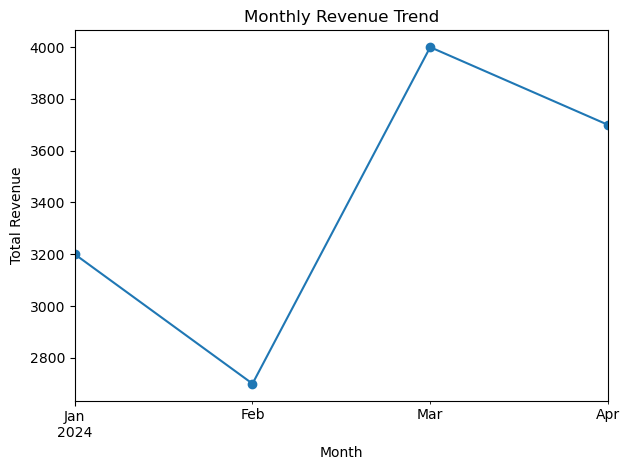

In [17]:
monthly_trend = df.groupby('Month')['Total Revenue'].sum()
monthly_trend.plot(kind='line', marker='o', title="Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.grid=(True)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

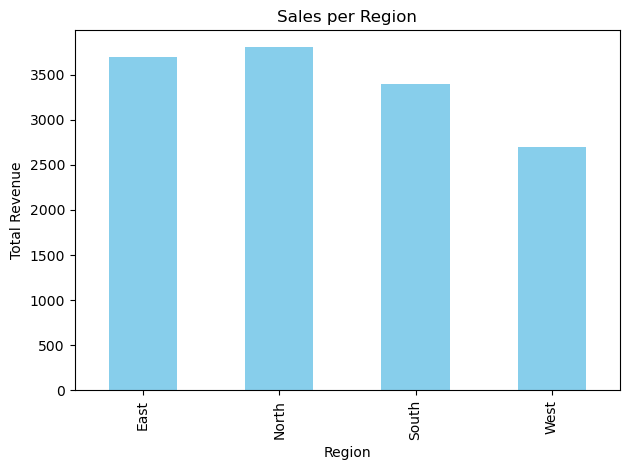

In [18]:
region_sale = df.groupby('Region')['Total Revenue'].sum()
region_sale.plot(kind='bar', title='Sales per Region', color='skyblue')
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

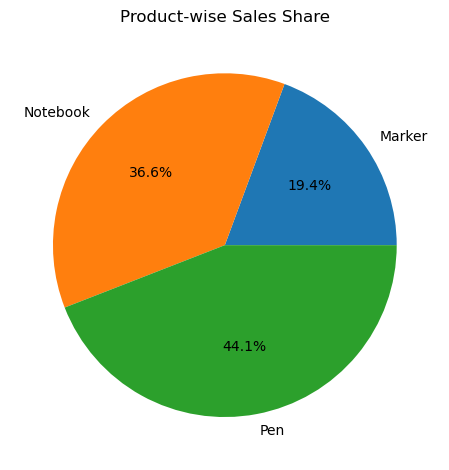

In [19]:
product_sales.plot(kind='pie', autopct='%1.1f%%', title="Product-wise Sales Share")
plt.ylabel("")
plt.tight_layout()
plt.show